# 04. Números de punto flotante y redondeo

### 1. Números de punto flotante y la norma IEEE 754

Los números de punto flotante son números reales que tienen la forma:

\begin{equation}
x = (-1)^\sigma m \times \beta^e,
\end{equation}
donde $\beta\geq 2$ es un entero mayor que define la *base*, $m = (b_0.b_1\, b_2\, b_3  \cdots)_\beta$ es la *mantisa* o *significante* escrita en la base $\beta$, donde $b_i = {0, 1, \dots, \beta-1}$, y $\sigma$ sirve para definir el signo. Finalmente, $e$, el exponente, es un número entero. Para evitar *las colas infinitas de nueves*, que en binario son las de unos, uno además pide que $0\leq b_i \leq \beta-2$ para un número infinito de $i$'s.

Este conjunto es *no numerable*, como los reales. Esta representación *no es única*.

Llevar los reales a la computadora obviamente involucra hacer dos concesiones:  en primer lugar, uno debe considerar conjuntos *finitos* de números como modelo de los reales, y en segundo término, que la representación sea *única*.

En particular, pedimos que el primer dígito $b_0$ no sea cero para todo $x$ distinto de cero; los números de punto flotante que satisfacen esta condición se llaman *normales* o *normalizados*.

Hacer que el número de *bits* (o sea, la base es $\beta=2$) sea finito no es suficiente considerar
que la mantisa consista de un número finito de entradas, sino además que el rango de $e$ sea *finito*. Esto es:

\begin{eqnarray}
m & = & (b_0.b_1\,b_2\,\cdots \, b_p),\\
e & \in & [ e_{min}, e_{max} ].\\
\end{eqnarray}

Aquí, $p$ se conoce como el número de *dígitos significativos* (*precision* en inglés), que **no** hay que confundir con la precisión (*accuracy*).

En el caso de la representación binaria, dado que $b_0=1$, entonces uno *puede* obviar esto, lo que significa que el bit $b_0$ **no** se guarda. A esta convención se le llama la *regla del bit escondido* (*hidden bit rule*). 

-----

**Ejercicio 1** 

Dados $p$, $e_{min}$ y $e_{max}$, usando el sistema binario, ¿de cuántos números *normales* consiste el conjunto? ¿Y si se trata de otra base $\beta$? ¿Están uniformemente distribuidos los números normales? ¿Cuál es la distancia entre el 0 y el primer número positivo distinto de cero?
*NOTA* Para guiar la respuesta, uno puede jugar con $\beta=2$, $p=2$,  $e_{min} = -1$ y $e_{max} = 2$, pero la idea es obtener expresiones generales.

(Entre paréntesis, a estas alturas del partido deben haber escrito funciones que permiten pasar de un entero a una cadena binaria equivalente, y viceversa, y de un número de punto flotante en base 10 al equivalente en binario, y viceversa. No sólo se trata de que estas funciones estén escritas, sino de que nos sean *útiles*, o sea, de que den resultados que podemos confiar y usar.)


---

**Ejercicio 2** 

¿Cómo se representa al $x=0$ en el conjunto anterior? ¿Funciona la regla del bit escondido para una base $\beta>2$?

Del ejercicio 1 arriba, uno se da cuenta de que hay una distancia anómalamente grande entre 0 y el primer número positivo. Esto trae problemas prácticos relacionados con la pérdida de precisión cuando se tienen cantidades cercanas a cero. La manera de evitar esto es permitir que haya ciertos números que no son normales; a éstos se les llama *subnormales*. Un número distinto de cero es subnormal si $b_0=0$. Esto permite llegar a cero de manera gradual al incorporar estos números al conjunto de números representables.


---

**Ejercicio 3**

En el ejemplo de juguete anterior ($\beta=2$, $p=2$,  $e_{min} = -1$ y $e_{max} = 2$) enumera los posibles números subnormales. ¿Cómo cambia la distancia de 0 al número positivo más próximo? ¿El espaciamiento entre los números subnormales, es uniforme?


---

**Ejercicio 4**

¿Qué expresiones definen a $N_{min}$ y $N_{max}$, los números de punto flotante (positivos) mínimo y máximo? Obtén los resultados para los números normales y los subnormales.

La norma [IEEE 754](http://en.wikipedia.org/wiki/IEEE_floating_point) define el estándar de la representación de los números de punto flotante en las computadoras. En particular, aquí nos interesará la representación *en doble precisión* o de 64-bits, que consiste en el primer bit que contiene el signo $\sigma$, de un exponente $e$ de 11-bits que tiene un *sesgo* (*bias*) $B_*$ y de la mantisa que consta de $p=52$ bits (de facto, $p=53$, si se incluye la regla del bit escondido). El resultado claramente son los 64 bits de almacenamiento.

El sesgo se introduce por la siguiente razón. Sin sesgo, el exponente $e$ varía entre 0 y $2^{E_*} - 1$, donde $E_*$ son el número de bits asignados al exponente. Entonces, el sesgo se introduce *restando* $B_* = 2^{E_*-1} - 1$ del exponente, lo que de facto hace que el rango del exponente sea $e \in [-2^{E_*-1} + 1, 2^{E_*-1}]$.



---

**Ejercicio 5**

Usando `bits` y un poco de imaginación, cuáles son las reglas para representar
- $x=$`NaN`

- $x=$`Inf`

- un número $x>0$ *normal*

- un número $x$ *subnormal*

- $x=0.0$ y $x = -0.0$

---

**Ejercicio 6**

- Dado que los números de punto flotante son *finitos*, construye la representación decimal de dos números normales de punto flotante *consecutivos*, y dos subnormales consecutivos.

- ¿Cuál es la representación binaria del promedio de esos dos números? ¿Qué obtienes a partir de tus programas?

- ¿Cuál es la representación binaria de la diferencia?

---

**Ejercicio 7** Donde *todo esto*, y mucho más, puede ser importante...

Escribe una función que evalúe

\begin{equation}
f(x,y) = 333.75 y^6 + x^2 (11 x^2 y^2 - y^6 - 121 y^4 - 2) + 5.5 y^8 + \frac{x}{2y}
\end{equation}

Usando esta función, *demuestra* que $f(x=77617, y=33096) = -0.8273960599468214$.

**NOTA** Los números han sido verificados y *son correctos* :-)

In [2]:
function real(σ, m, β, e)
    return (-1)^σ*m*β^e
end

real (generic function with 1 method)

In [72]:
σ = 0
m = 1.01001
β = 2
e = 15

y = real(σ, m, β, e)

33096.00768

In [73]:
σ = 0
m = 1.184342
β = 2
e = 16

x = real(σ, m, β, e)

77617.037312

In [70]:
function f(x, y)
    return 333.75*y^6+(11*(x^2)*(y^2)-(y^6)-121*(y^4)-2)*(x^2)+5.5*(y^8)+x/(2y)
end

f (generic function with 1 method)

In [80]:
f( big(77617.0), big(33096.0))

-8.273960599468213681411650954798162919990331157843848199178148416727096930142628e-01 with 256 bits of precision

In [74]:
f( x, y)

-3.937458994731055e30

In [77]:
big(77617.0)

7.7617e+04 with 256 bits of precision

###### Nada mas habia que hacer la operacion con `big`

---

**Ejercicio 8**

Pensando en que vas a generar datos para hacer una gráfica (con suficientes puntos), genera dichos datos para los *polinomios* $f(x) = (1-x)^6$ y $g(x) = x^6 -6x^5 + 15x^4 -20 x^3 + 15x^2 - 6 x + 1$, en el dominio $0.995 \leq x \leq 1.005$. ¿Hay algo sorprendente en esto?

In [81]:
X = 0.995:.001:1.005

0.995:0.001:1.005

In [82]:
function p(x)
    return (1-x)^6
end

function q(x)
    return x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1
end

q (generic function with 1 method)

In [86]:
Q_buena = Float64[]
P_buena = Float64[]

Q_mala = Float64[]
P_mala = Float64[]

for x in X
    push!(P_buena, p( big(x) ) )
    push!(Q_buena, q( big(x) ) )
    
    push!(P_mala, p(x) )
    push!(Q_mala, q(x) )
end

In [85]:
using PyPlot

INFO: Loading help data...


In [96]:
p(big(0.001))

9.940149800149940008757231624284953636137355338023108434698425590721729667644721e-01 with 256 bits of precision

In [97]:
big(p(0.001))

9.94014980014993998480576919973827898502349853515625e-01 with 256 bits of precision

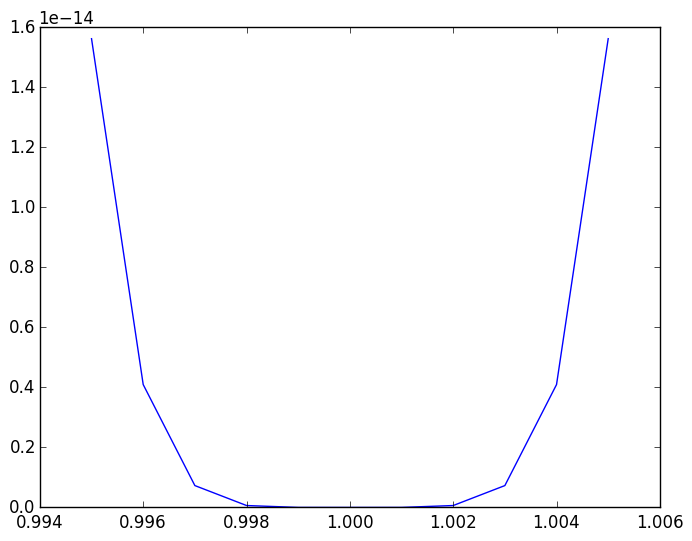

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1161b2590>

In [87]:
plot(X, P_mala)

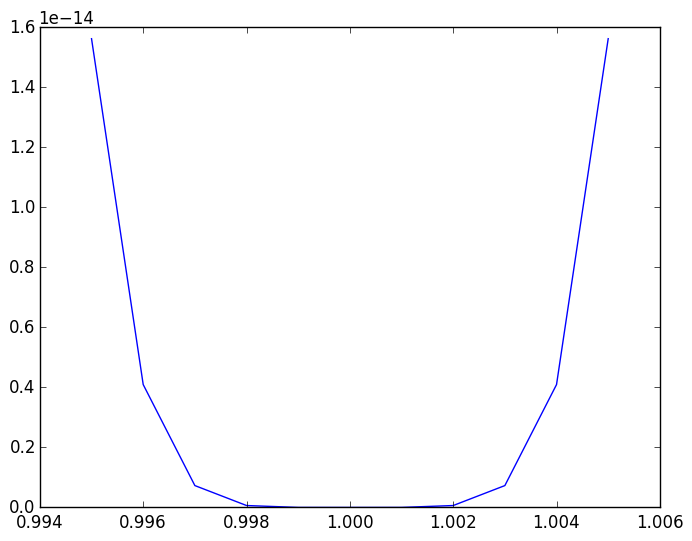

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1165f4350>

In [88]:
plot(X, P_buena)

In [89]:
P_buena

11-element Array{Float64,1}:
 1.5625e-14
 4.096e-15 
 7.29e-16  
 6.4e-17   
 1.0e-18   
 0.0       
 1.0e-18   
 6.4e-17   
 7.29e-16  
 4.096e-15 
 1.5625e-14

In [90]:
P_mala

11-element Array{Float64,1}:
 1.5625e-14
 4.096e-15 
 7.29e-16  
 6.4e-17   
 1.0e-18   
 0.0       
 1.0e-18   
 6.4e-17   
 7.29e-16  
 4.096e-15 
 1.5625e-14

In [93]:
for x in 1:length(X)
    println( P_mala[x] - P_buena[x])
end

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


---

**Ejercicio 9**

Explica por qué es mala idea usar como paso de integración $0.1$ o $0.01$, u otros valores de este estilo. ¿Qué pasa con el tiempo que vas calculando en cada paso de la integración?

In [98]:
4*'4'

208

In [100]:
1*'4'

52

In [102]:
2*'\0'

0